In [2]:
import sys
sys.path.insert(0, '../python')
%matplotlib inline

import os
import numpy
import matplotlib.pyplot as plt
from detector import detector
from parseData import parseChar2013
from arrayOp import stack2image
from imgOp import image_load, image2edge, image_norm, imShow, image2bb, image_save, img_resize
from fileOp import codebook_load, data_load, pickle_load
from featExt import maximalResize, conv2d
from scipy.misc import imresize
import pickle

from skimage.feature import corner_fast
from skimage.filters import sobel_h, sobel_v, sobel
from skimage.color import rgb2lab, rgb2grey
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral


/home/sxz8564/virtualenvs/myenv/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
dirname = '../data/ex2/res'
imdir = '../icdar2013/task21_22/test/image/'
dirlist = os.listdir(imdir)

In [4]:
def image2edge(img, mode = 'color'):
    img = rgb2lab(img)
    img0 = img[:, :, 0]
    img1 = img[:, :, 1]
    img2 = img[:, :, 2]
    img0x = sobel_h(img0)
    img0y = sobel_v(img0)
    img1x = sobel_h(img1)
    img1y = sobel_v(img1)
    img2x = sobel_h(img2)
    img2y = sobel_v(img2)
    a = img0x**2 + img1x**2 + img2x**2
    b = img0y**2 + img1y**2 + img2y**2
    c = numpy.multiply(img0x, img0y) + numpy.multiply(img1x, img1y) + numpy.multiply(img2x, img2y)
    a = numpy.float32(a)
    b = numpy.float32(b)
    c = numpy.float32(c)
    lembdaimg = 0.5*(a+b+((a-b)**2+4*c**2)**0.5)
    return lembdaimg

def imshow(img):
    fig, ax = plt.subplots(figsize = [10, 10])
    plt.imshow(img.transpose(), interpolation = 'nearest')
    plt.axis('off')
    plt.show()
    return

img_228.jpg


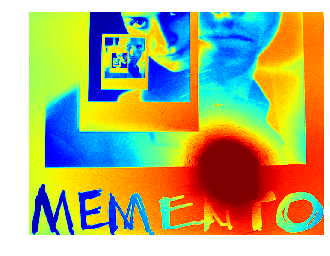

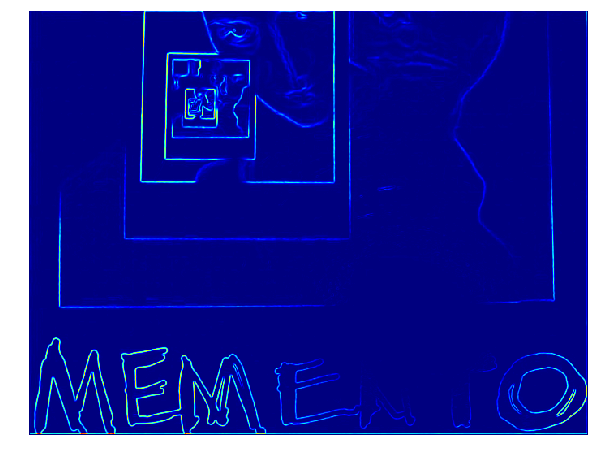

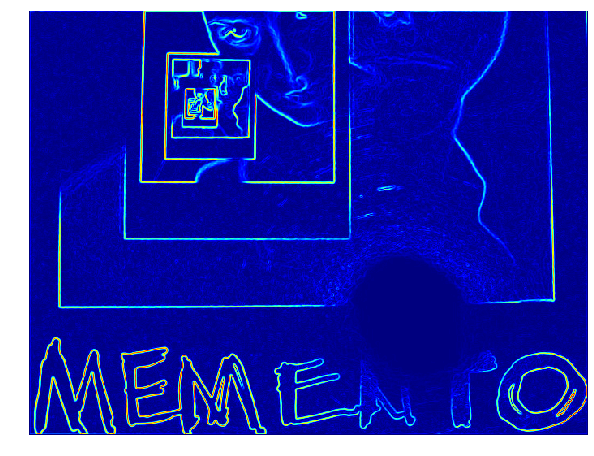

KeyboardInterrupt: 

In [5]:
for f in dirlist:
    print f
    imgname = f
    raw = image_load(imgname, imdir, flatten = False)
    #raw = denoise_bilateral(raw, win_size = 32, sigma_range = 0.8, sigma_spatial = 4)
    edge_color = image2edge(raw, mode = 'color')
    edge_grey = sobel(rgb2grey(raw))
    imShow(rgb2grey(raw).transpose())
    edge_color = image_norm(edge_color)
    edge_grey = image_norm(edge_grey)
    imshow(edge_color)
    imshow(edge_grey)
    raw_input()
#    for r in range(30):
#        ratio = 0.9**r
#        img = img_resize(raw, ratio)
#        edge = image2edge(img, 'color')
#        fast = corner_fast(img)
#        imShow(fast.transpose())

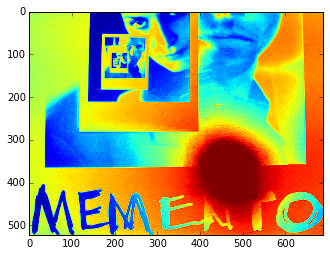

In [8]:
import cv2
import cv
greyim = numpy.uint8(rgb2grey(raw)*255)
plt.imshow(greyim.transpose())
#img = cv2.imread('foo.jpg', cv2.CV_LOAD_IMAGE_GRAYSCALE);
mser = cv2.MSER()
#greyim = cv2.fromarray(greyim)
mser_areas = mser.detect(greyim, None)


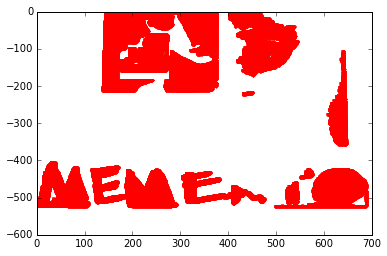

In [68]:
#plt.imshow(greyim.transpose())
fig, ax1 = plt.subplots()
for ma in mser_areas:
    ax1.plot(ma[:, 1], -ma[:, 0], 'r.')
    #plt.show()

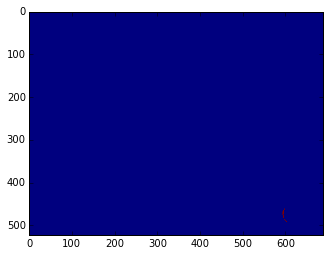

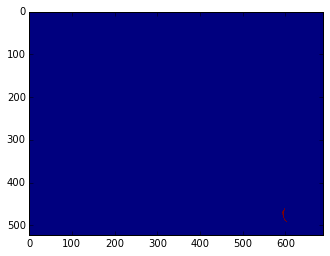

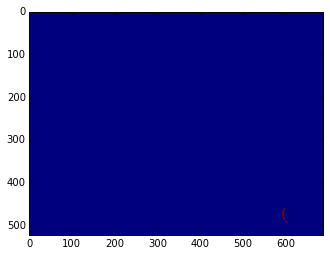

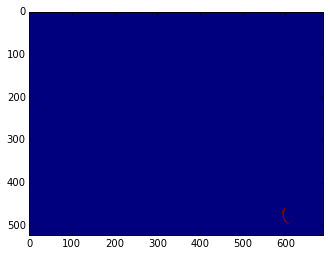

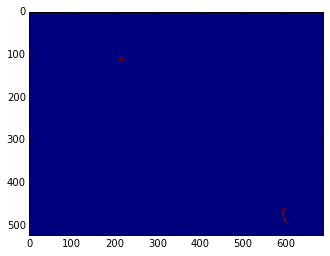

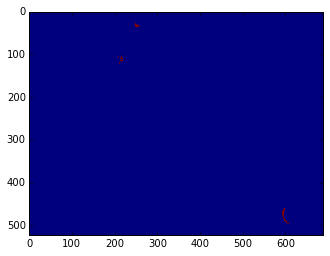

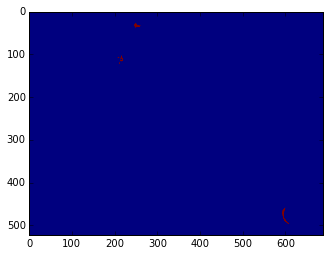

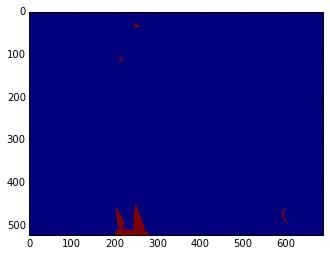

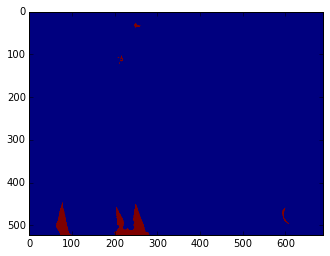

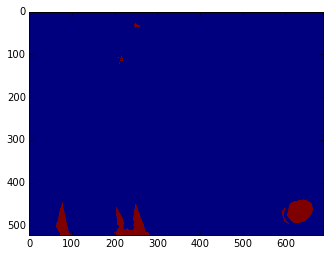

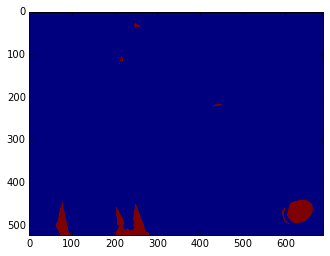

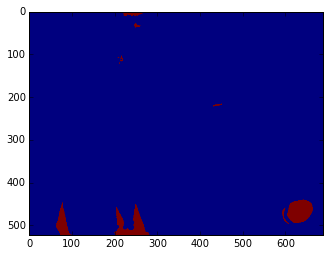

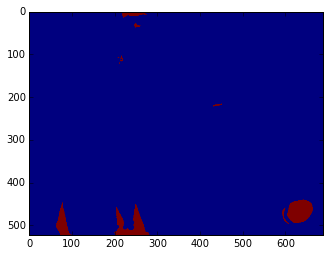

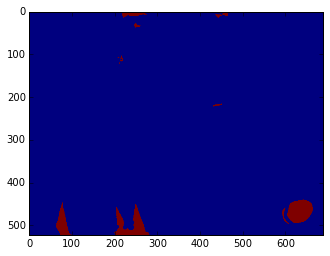

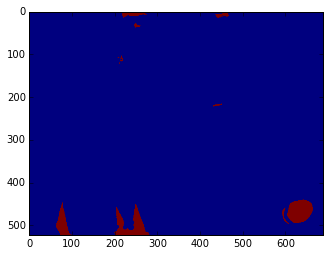

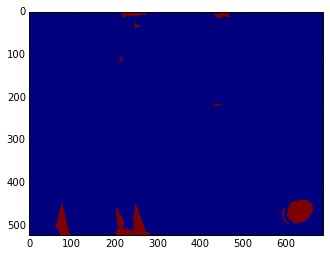

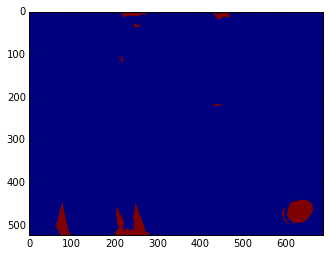

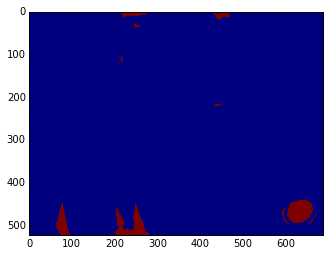

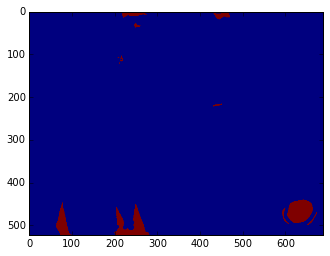

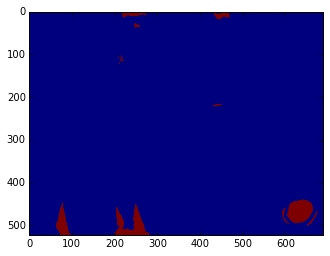

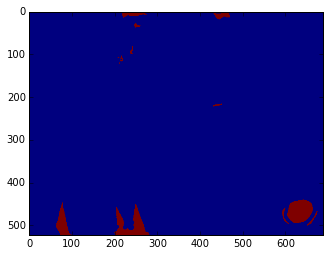

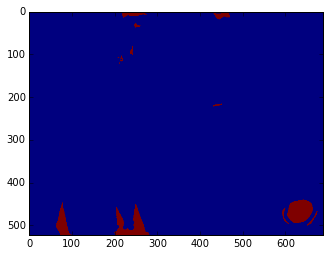

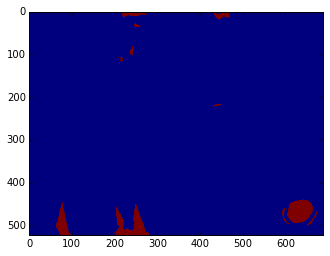

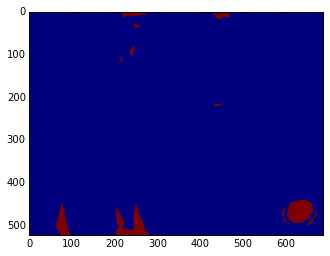

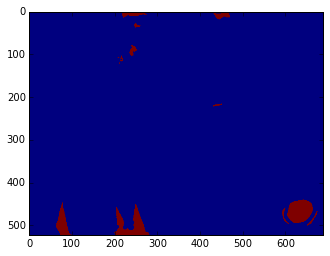

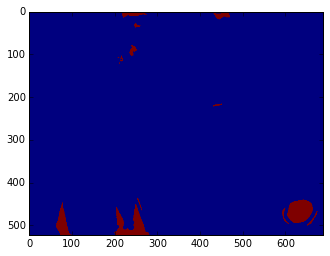

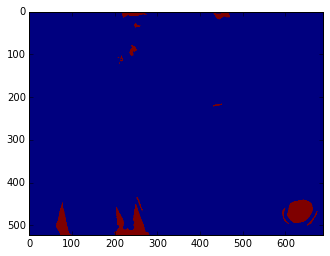

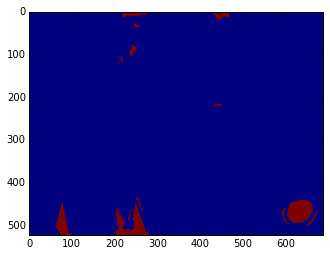

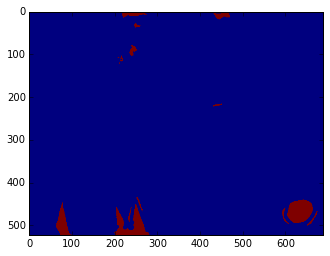

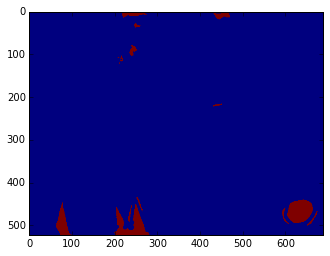

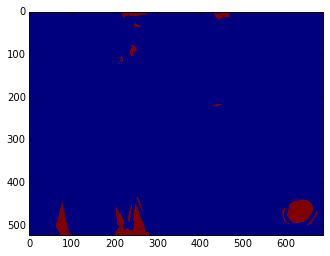

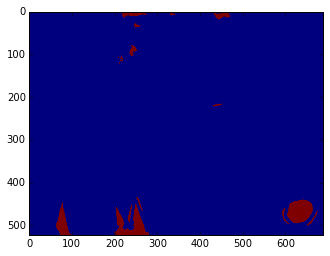

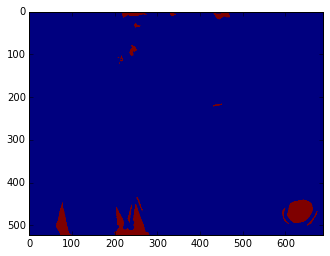

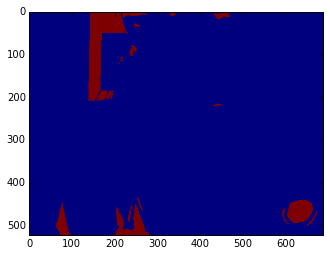

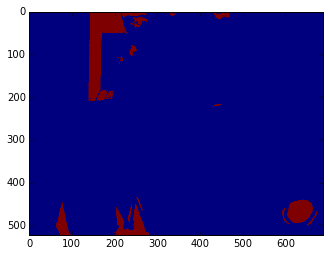

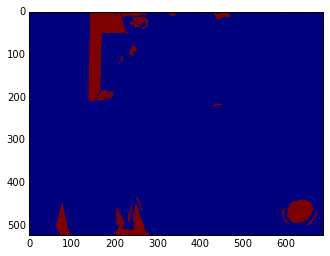

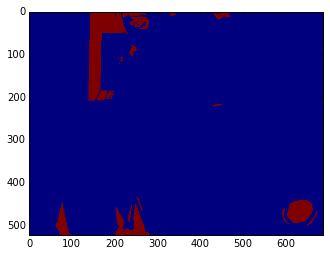

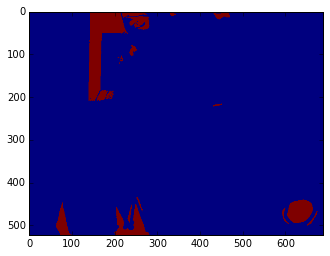

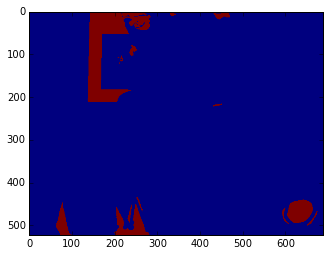

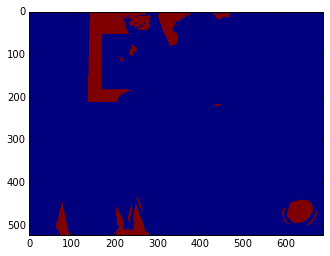

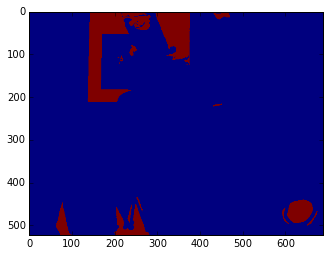

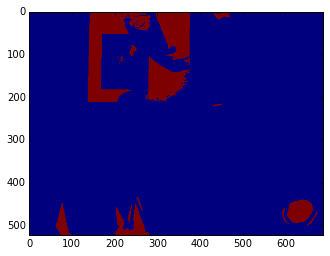

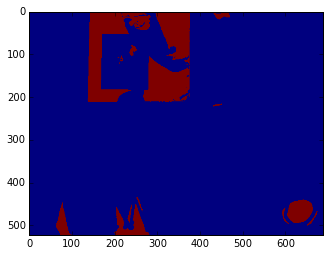

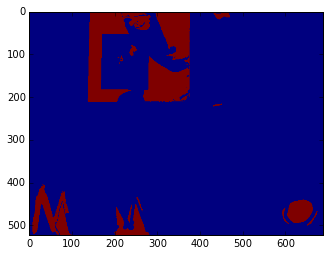

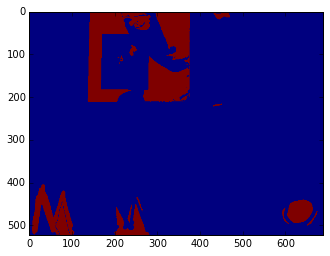

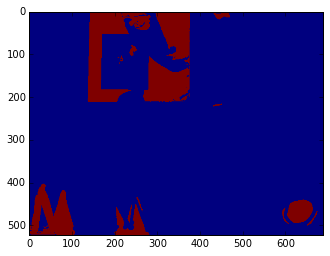

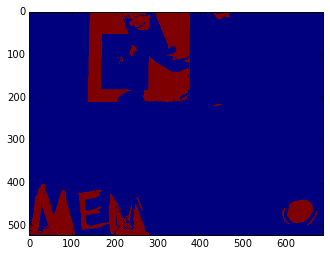

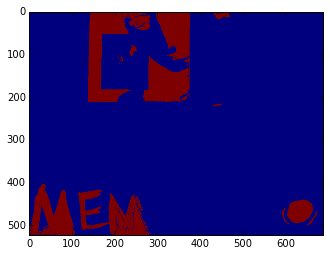

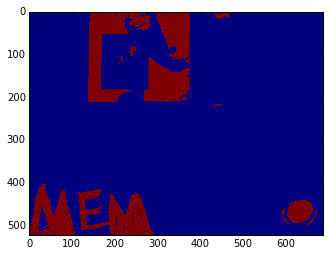

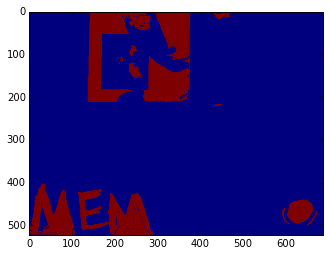

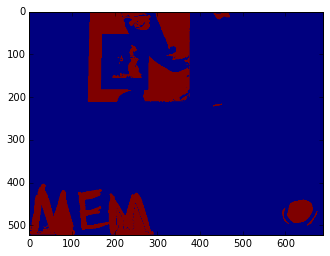

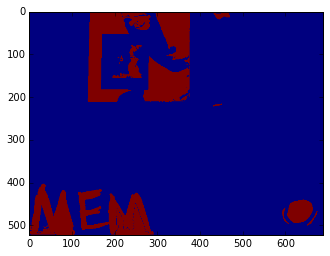

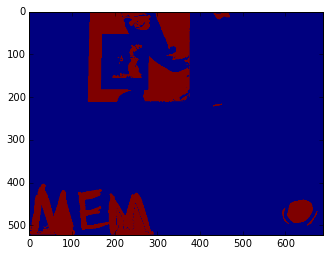

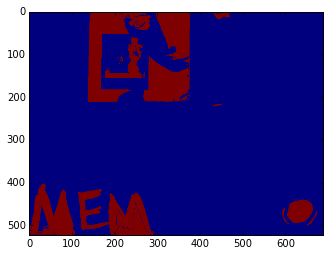

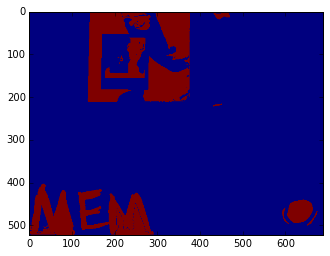

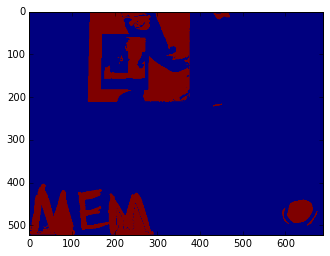

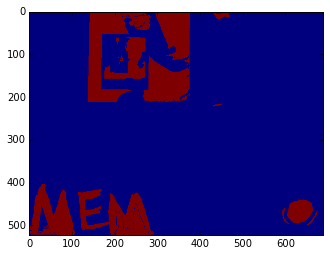

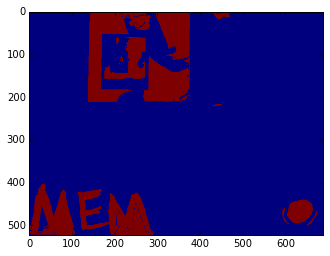

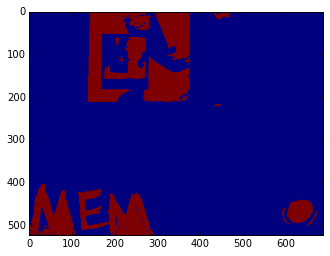

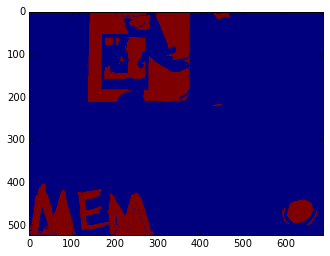

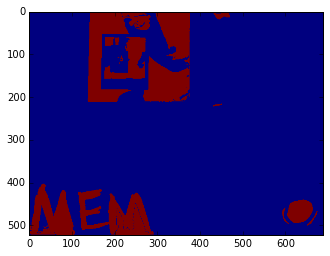

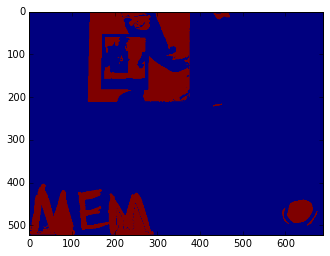

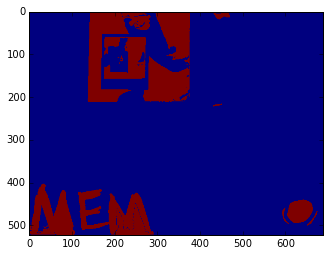

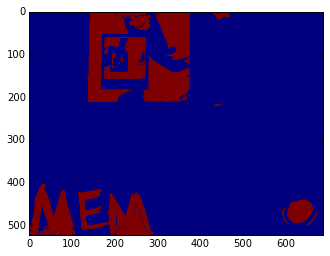

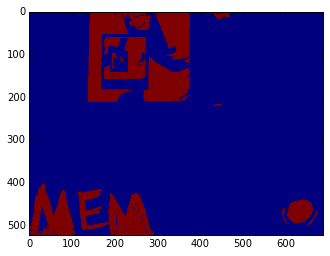

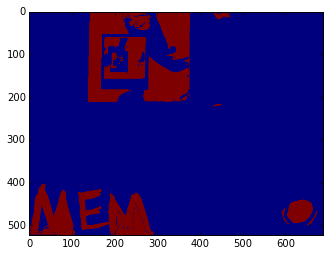

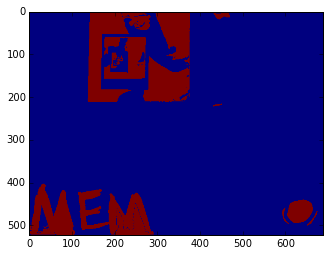

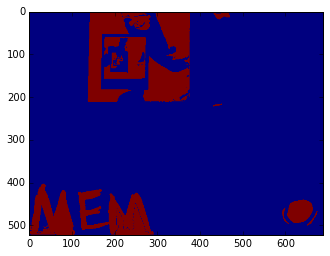

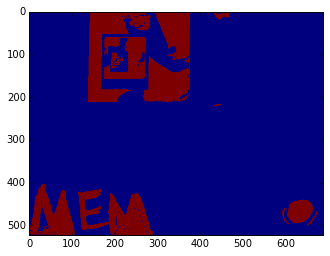

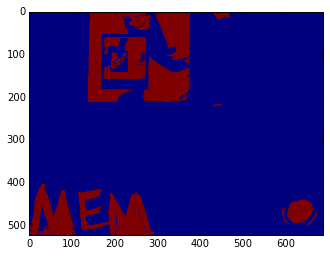

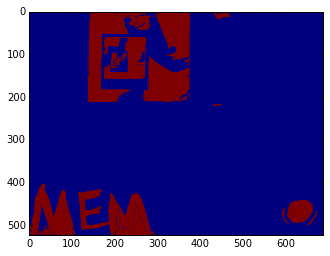

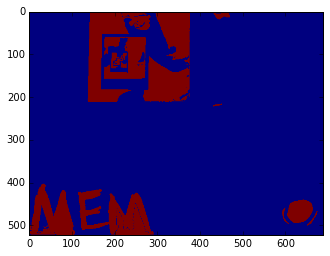

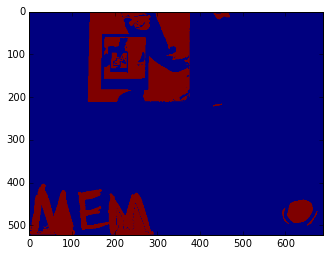

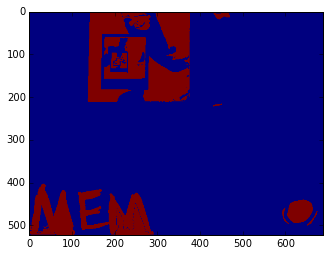

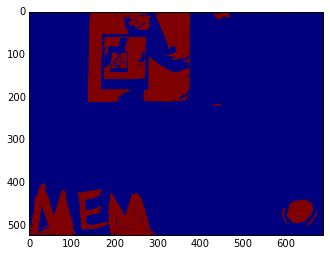

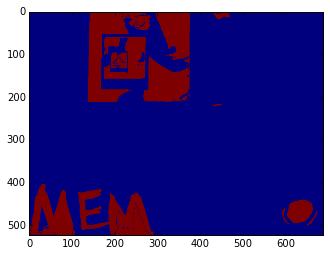

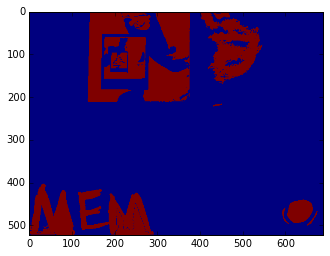

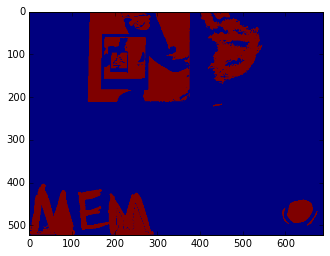

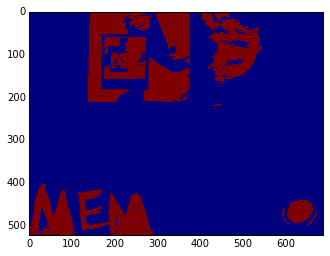

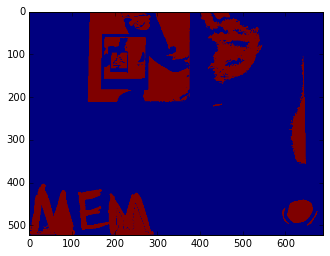

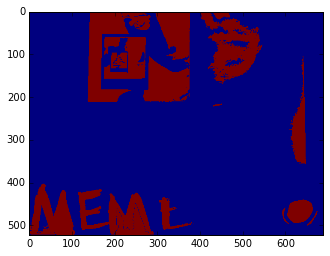

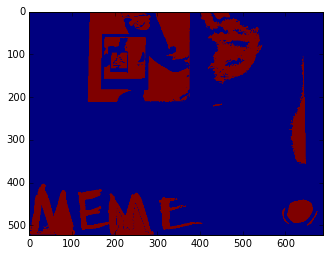

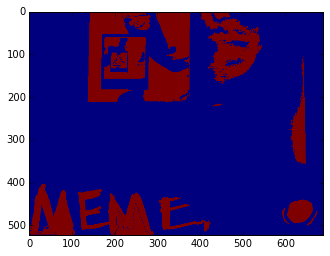

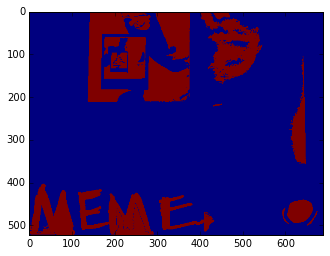

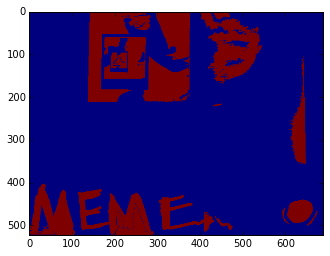

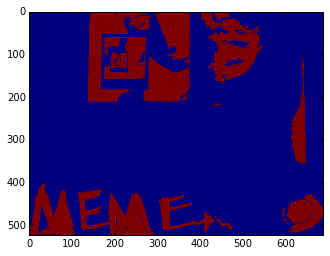

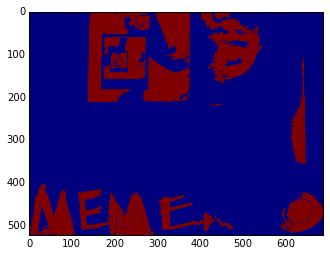

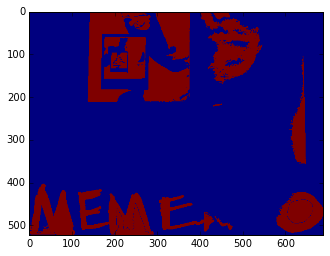

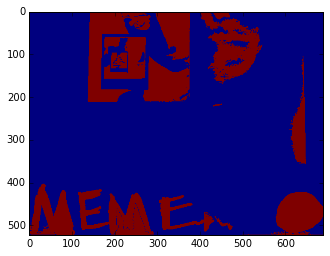

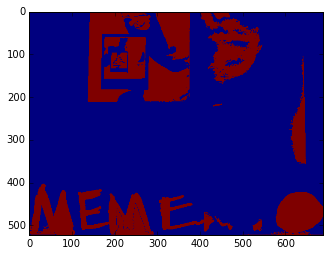

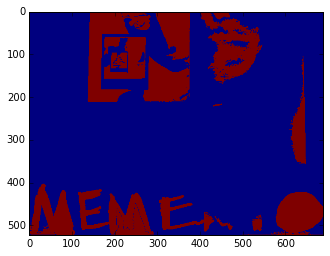

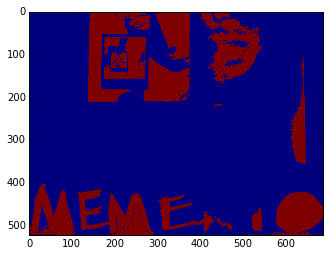

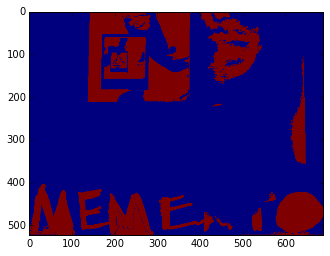

In [75]:
imzero = numpy.zeros(greyim.shape)
for ma in mser_areas:
    imzero[ma[:, 1], ma[:, 0]] = 1
    plt.imshow(imzero.transpose())
    plt.show()
#    raw_input()

In [66]:
len(mser_areas[33:34])

1

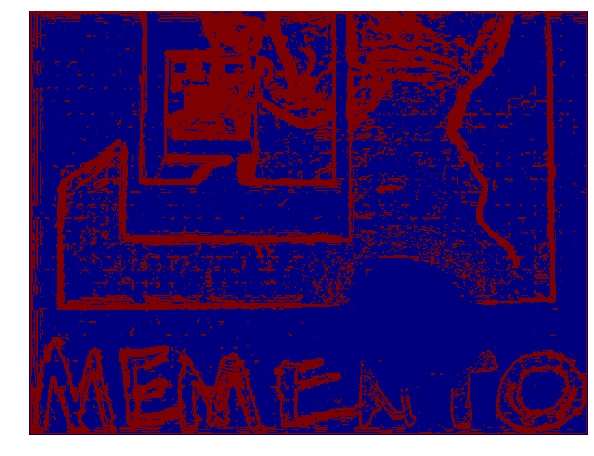

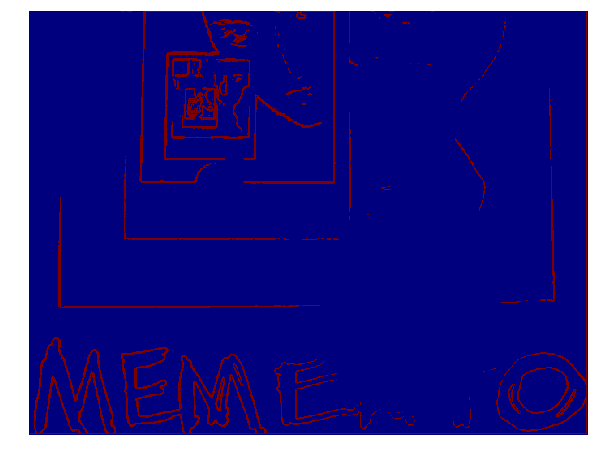

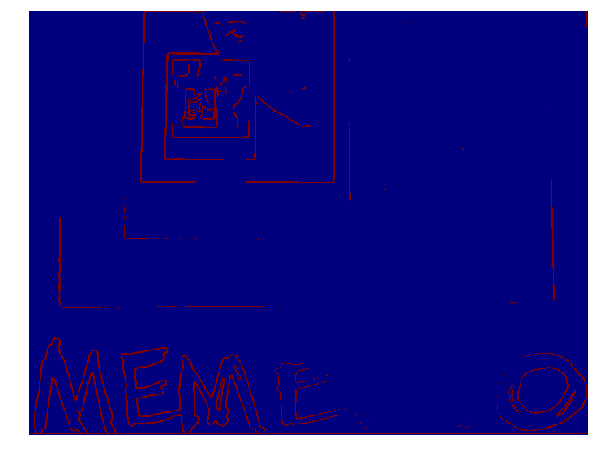

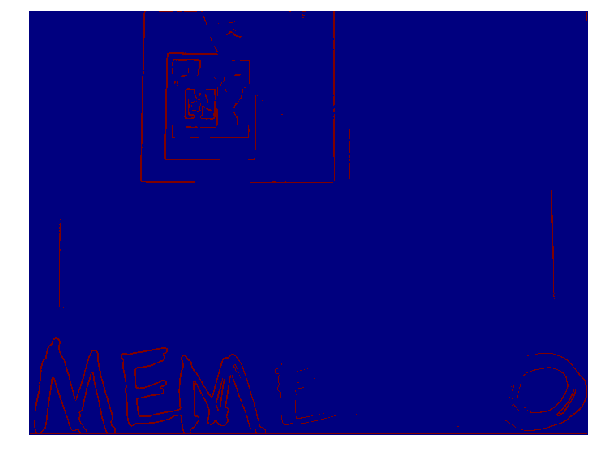

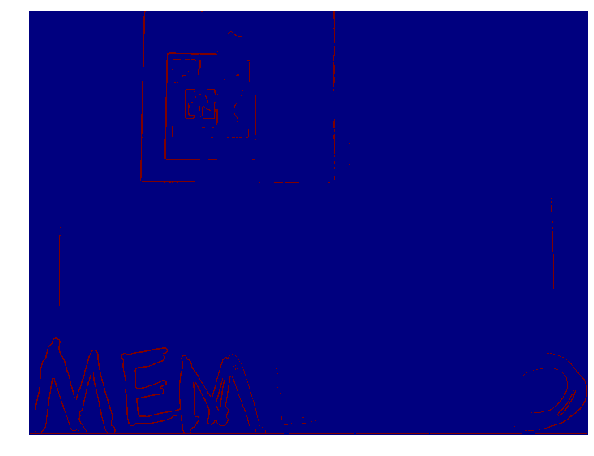

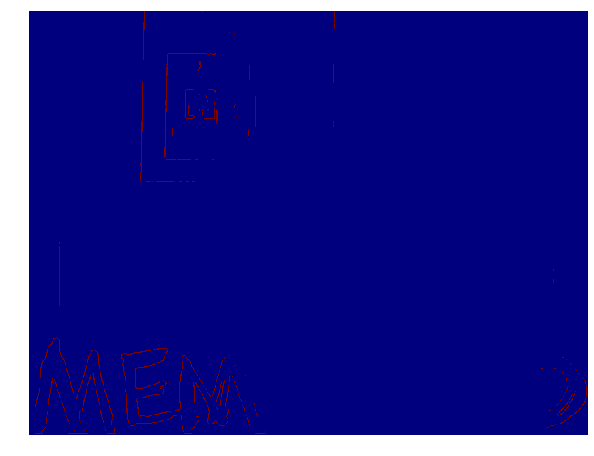

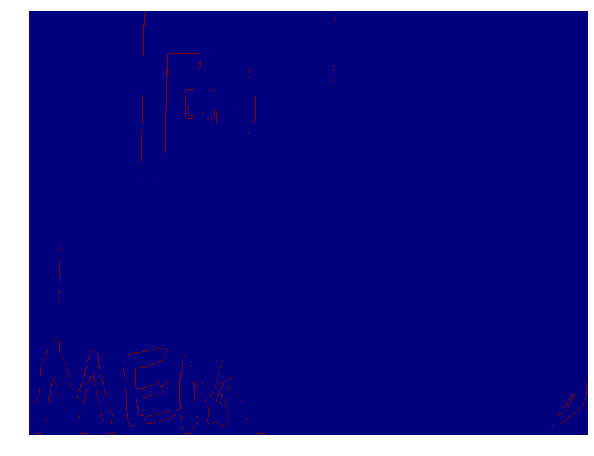

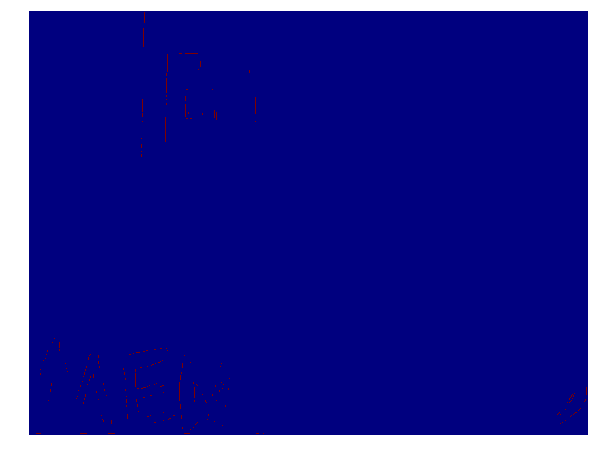

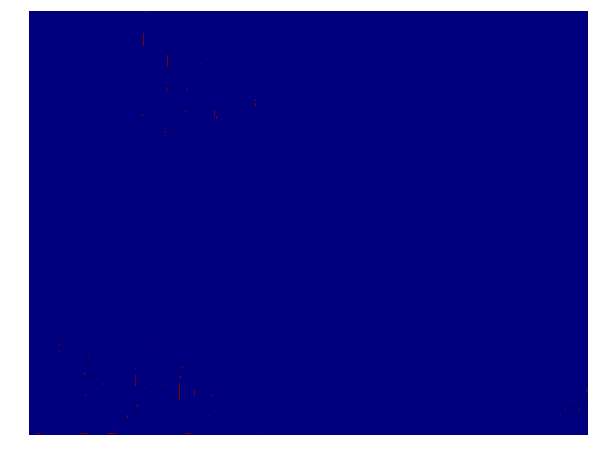

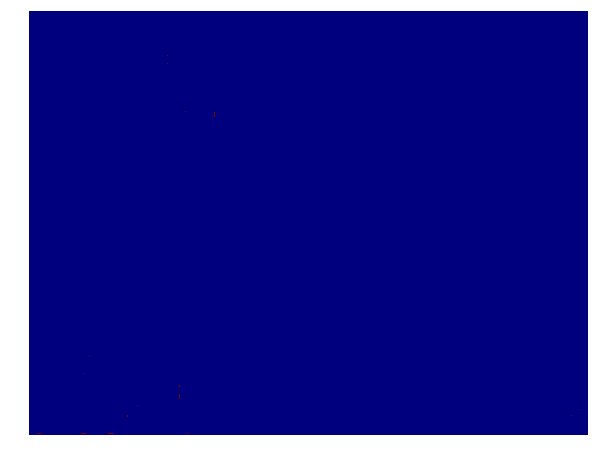

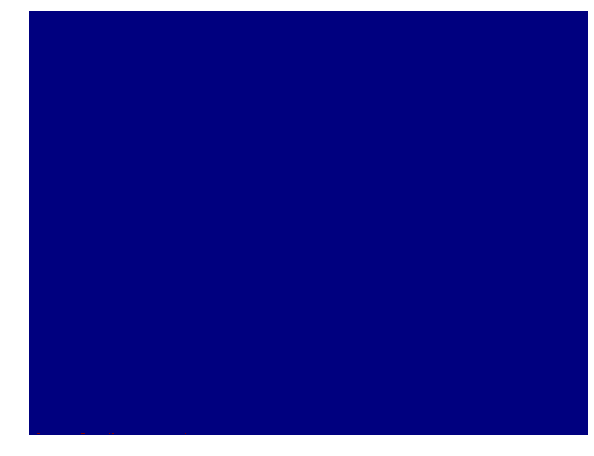

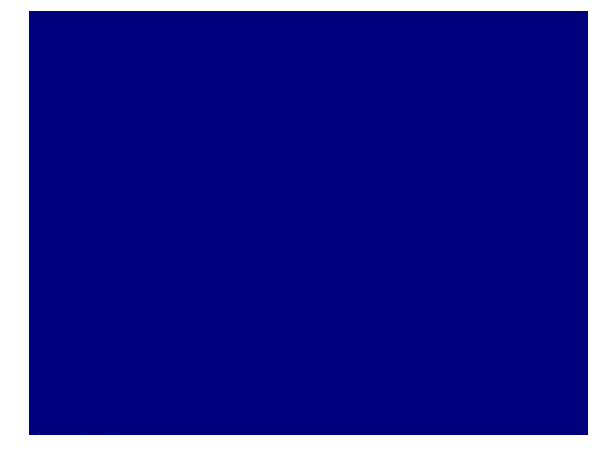

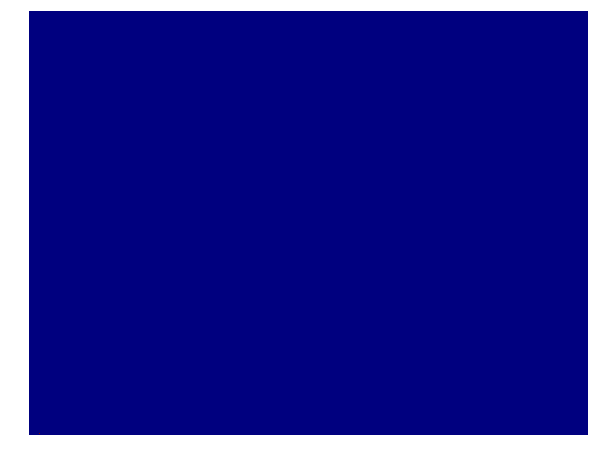

In [135]:
for i in range(0, 255, 20):
    fig, ax = plt.subplots(figsize = [10, 10])
    plt.imshow(edge_color.transpose() > i, interpolation = 'nearest')
    plt.axis('off')
    plt.show()

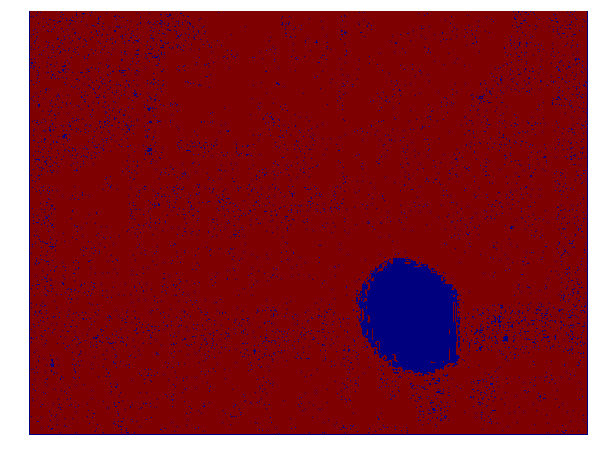

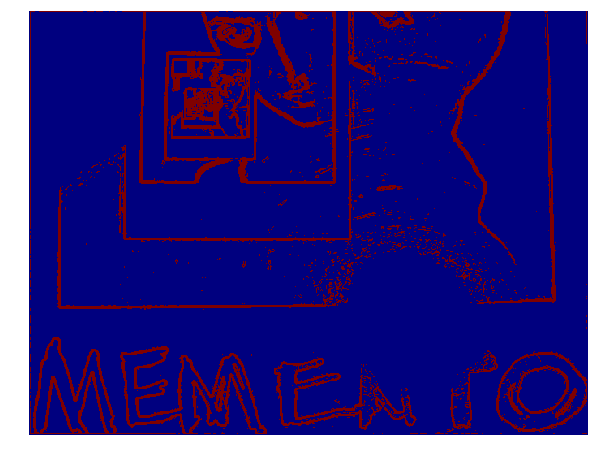

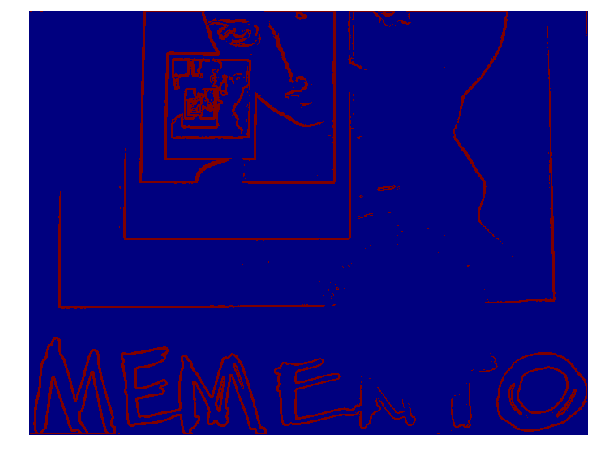

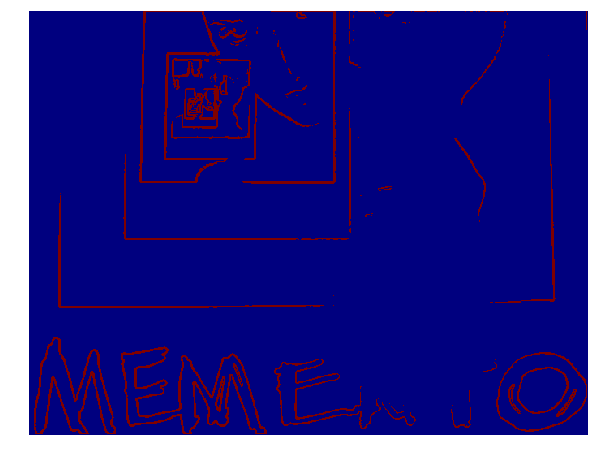

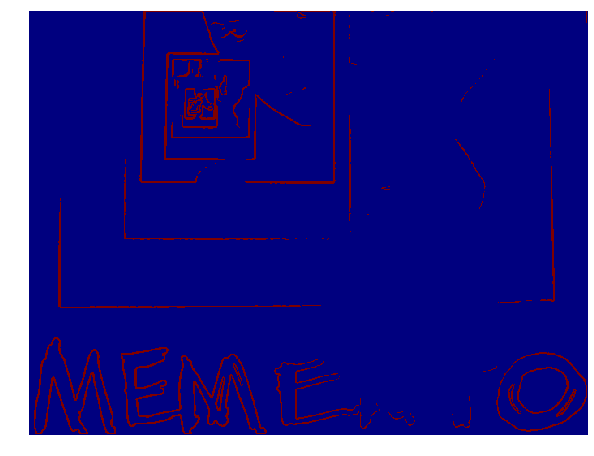

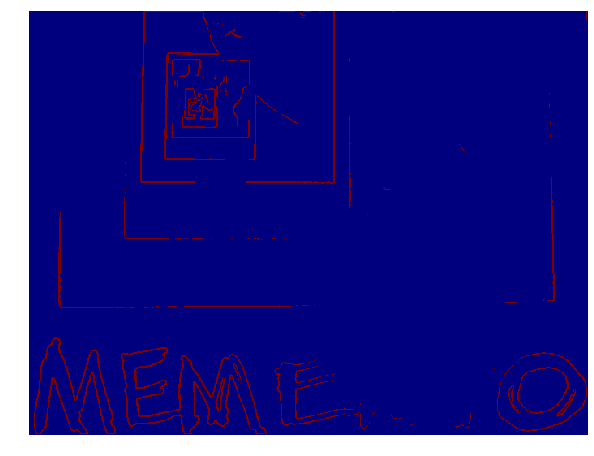

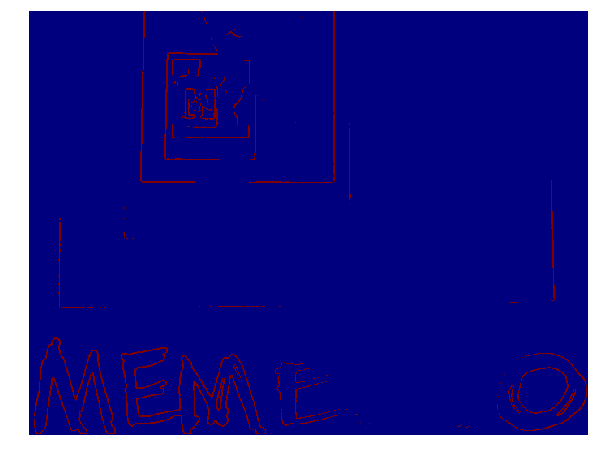

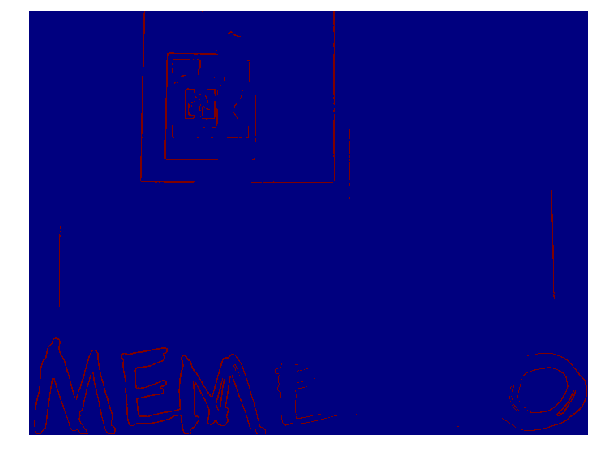

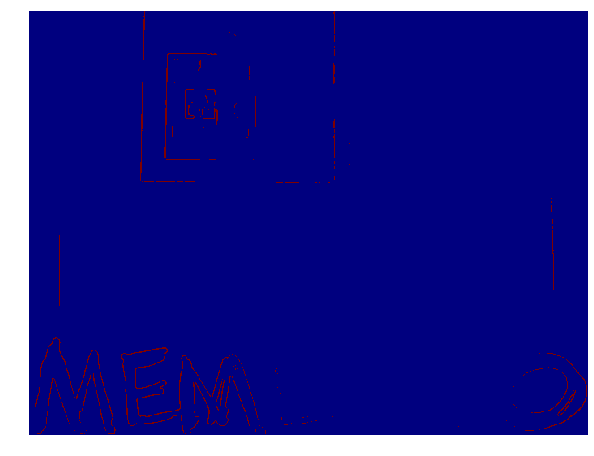

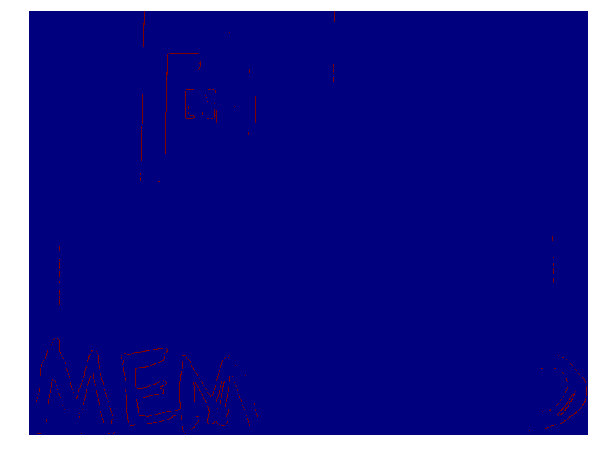

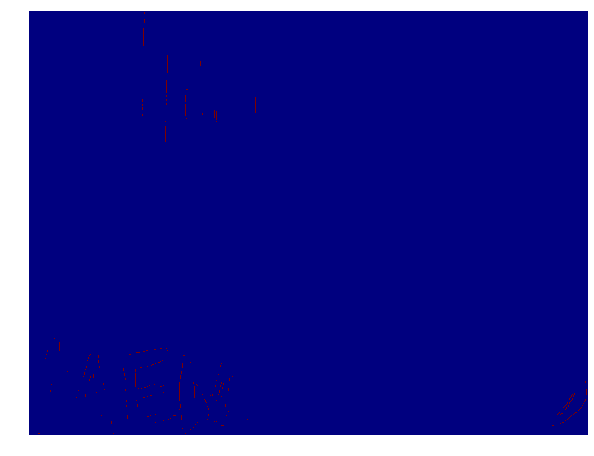

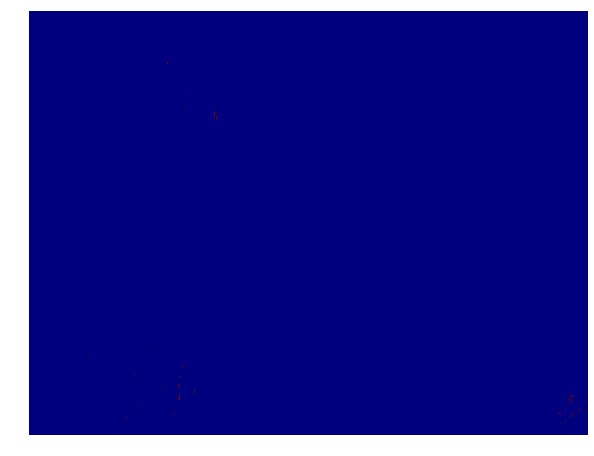

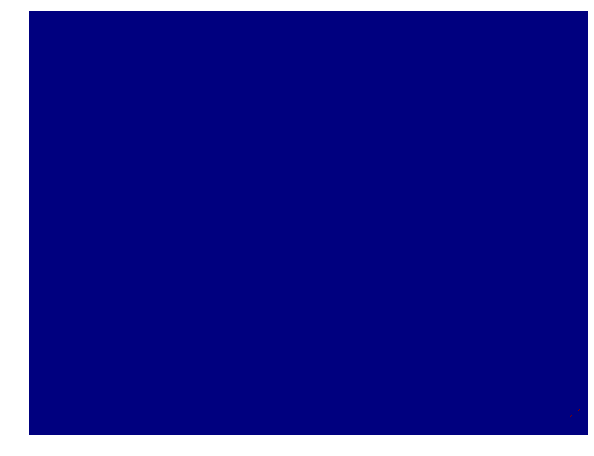

In [175]:
for i in range(0, 255, 20):
    fig, ax = plt.subplots(figsize = [10, 10])
    plt.imshow(edge_grey.transpose() > i, interpolation = 'nearest')
    plt.axis('off')
    plt.show()

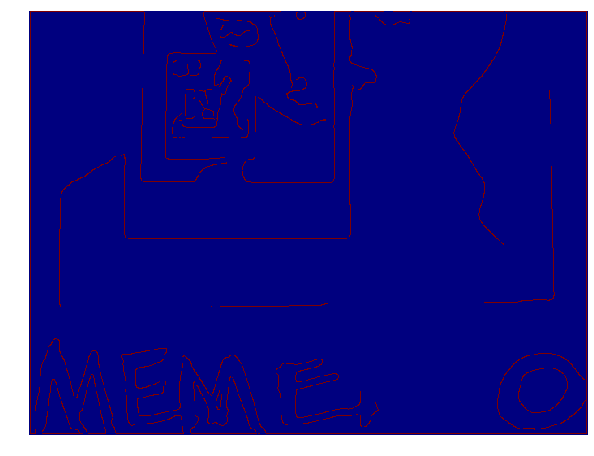

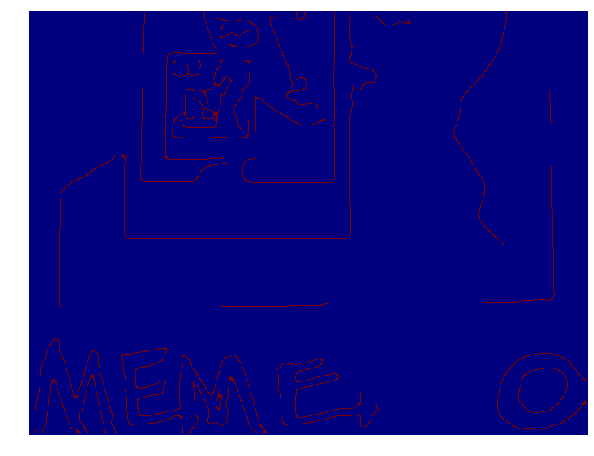

In [171]:
from skimage.feature import canny
from scipy.ndimage.morphology import binary_closing
edge_canny = canny(rgb2grey(raw), 0.1)
imshow(edge_canny)
imshow(binary_closing(edge_canny, iterations = 2))

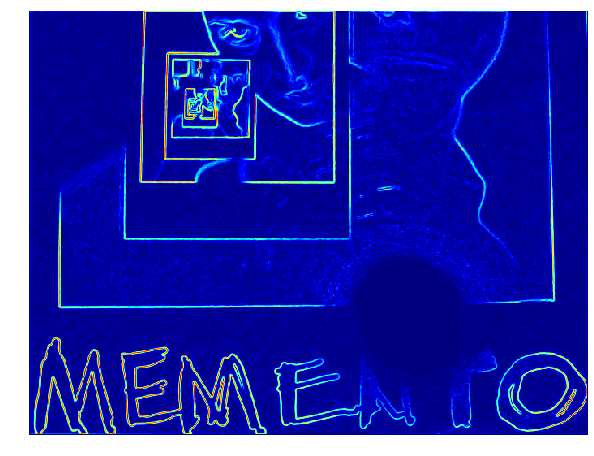

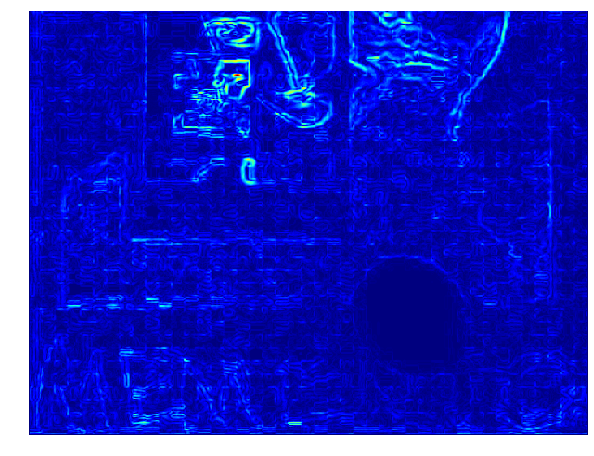

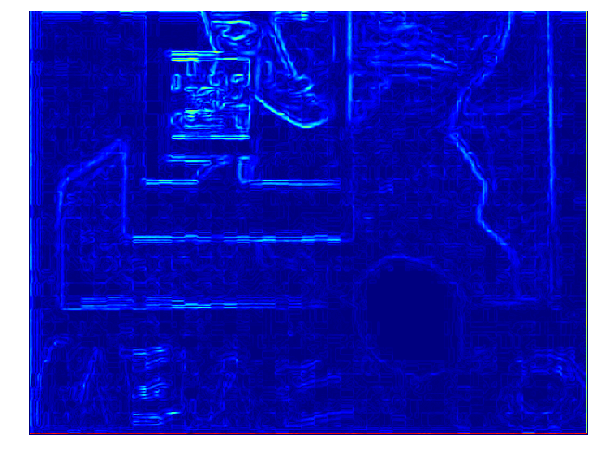

In [176]:
imshow(sobel(rgb2lab(raw)[:, :, 0]))
imshow(sobel(rgb2lab(raw)[:, :, 1]))
imshow(sobel(rgb2lab(raw)[:, :, 2]))

In [155]:
edge_color.shape

(689, 523, 3)